In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def region_growing(im: np.ndarray, seed_points: list, T: int) -> np.ndarray:
    """
        A region growing algorithm that segments an image into 1 or 0 (True or False).
        Finds candidate pixels with a Moore-neighborhood (8-connectedness). 
        Uses pixel intensity thresholding with the threshold T as the homogeneity criteria.
        The function takes in a grayscale image and outputs a boolean image.

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
            seed_points: list of list containing seed points (row, col). Ex:
                [[row1, col1], [row2, col2], ...]
            T: integer value defining the threshold to be used for the homogeneity criteria.
        return:
            (np.ndarray) of shape (H, W). dtype=bool
    """
    im = im.astype(float)
    segmented = np.zeros_like(im, dtype=bool)  # Segmented image (f_q)
    H, W = im.shape                            # Image dimensions

    active_front = []                  # Queue for the pixels to be checked
    for (row, col) in seed_points:
        segmented[row, col] = True     # Mark seed points as segmented
        active_front.append((row, col, im[row, col]))  # Include intensity of seed

    while len(active_front) > 0:  # While there are points in the queue
        p_r, p_c, I_p = active_front.pop() # Pot the first point p and its intensity, I_p
                                           # p_r: row of seed, p_c: column of seed
        # Define neighbors with 8-connectivity
        neighbors = [
            (p_r + 1, p_c), (p_r - 1, p_c), (p_r, p_c + 1), (p_r, p_c - 1),
            (p_r + 1, p_c + 1), (p_r + 1, p_c - 1), (p_r - 1, p_c + 1), (p_r - 1, p_c - 1)
        ]
        neighbors = [(row, col) for row, col in neighbors if 0 <= row < H and 0 <= col < W]  # Remove out of bounds indexes

        for q_r, q_c in neighbors:   # Iterate over the neighbors, q_r: row of neighbor, q_c: column of neighbor
            # Handle only non-handled pixels with intensity difference below the threshold
            if not segmented[q_r, q_c] and abs(I_p - im[q_r, q_c]) < T:
                segmented[q_r, q_c] = True    # Mark as segmented
                active_front.append((q_r, q_c, I_p))  # Add to the active front

    return segmented


In [3]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("defective-weld.png")

    seed_points = [ # (row, column)
        [254, 138], # Seed point 1
        [253, 296], # Seed point 2
        [233, 436], # Seed point 3
        [232, 417], # Seed point 4
    ]
    intensity_threshold = 50
    segmented_image = region_growing(im, seed_points, intensity_threshold)

    assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
        im.shape, segmented_image.shape)
    assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
            segmented_image.dtype)

    segmented_image = utils.to_uint8(segmented_image)
    utils.save_im("defective-weld-segmented.png", segmented_image)


Reading image: images\defective-weld.png
Saving image to: image_processed\defective-weld-segmented.png


c:\Users\jonas\OneDrive - NTNU\Generelt\Studiene\Git_repo\Image_processing\Assignment_3\utils.py:56: UserWarning: C:\Users\jonas\OneDrive - NTNU\Generelt\Studiene\Git_repo\Image_processing\Assignment_3\image_processed\defective-weld-segmented.png is a low contrast image
  skimage.io.imsave(impath, im)


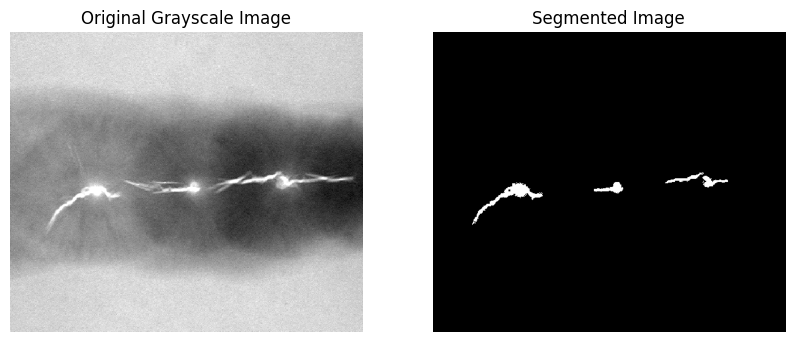

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')
axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Segmented Image')
axes[1].axis('off')
plt.show()